In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor


In [2]:
data_diageo_path = os.getcwd() +"/Diageo_Scotland_Full_Year_2024_Daily_Data.csv"
data_diageo_df = pd.read_csv(data_diageo_path)
data_diageo_df

,Timestamp,Site,Total_Energy_Consumption_MWh,Energy_Intensity_kWh_per_liter,Scope_1_Emissions_tonnes_CO2e,Scope_2_Emissions_tonnes_CO2e,Carbon_Intensity_kgCO2e_per_liter,On_Site_Renewable_Energy_Percentage,Boiler_Efficiency_Percentage,Water_Consumption_liters_per_liter,Waste_Heat_Recovery_Efficiency_Percentage,Fuel_Type_Gas_Usage_GJ,Logistics_Carbon_Footprint_kgCO2e_per_km
0,2024-01-01,Cameronbridge,1200.000000,50.551548,620.000000,744.000000,24.135068,25.346819,84.366987,3.023810,50.244845,4743.014851,98.757801
1,2024-01-02,Cameronbridge,1220.336832,52.795982,630.168416,754.168416,24.737036,27.344138,81.253632,3.309988,53.408596,4759.210566,97.878840
2,2024-01-03,Cameronbridge,1237.157241,53.827440,638.578621,762.578621,22.849584,25.855816,82.836088,3.498713,53.126516,4796.420737,99.839625
3,2024-01-04,Cameronbridge,1247.552826,54.349767,643.776413,767.776413,24.672162,27.707596,83.703809,3.368878,56.612486,4741.141220,92.280298
4,2024-01-05,Cameronbridge,1249.726095,52.237849,644.863047,768.863047,23.646243,26.709128,83.728319,3.495045,56.106178,4752.484949,99.776959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2024-12-27,Glenkinchie,755.136953,53.021742,361.297933,398.297933,22.527402,40.976877,82.297217,2.910961,53.900570,2834.780513,92.860829
1094,2024-12-28,Glenkinchie,756.223587,49.825899,361.678255,398.678255,22.921950,40.808303,85.575409,3.194417,56.082870,2892.715365,96.274911
1095,2024-12-29,Glenkinchie,761.421379,48.573540,363.497483,400.497483,22.587556,42.260500,85.697071,3.292287,60.510213,2934.002402,94.006122
1096,2024-12-30,Glenkinchie,769.831584,48.616730,366.441054,403.441054,21.496200,43.670324,80.000903,2.960094,53.902356,2929.604694,95.488502


In [3]:
data_diageo_numeriical_df = data_diageo_df.drop(labels=["Timestamp", "Site", "Scope_1_Emissions_tonnes_CO2e", "Scope_2_Emissions_tonnes_CO2e"], axis=1)
data_diageo_numeriical_df

,Total_Energy_Consumption_MWh,Energy_Intensity_kWh_per_liter,Carbon_Intensity_kgCO2e_per_liter,On_Site_Renewable_Energy_Percentage,Boiler_Efficiency_Percentage,Water_Consumption_liters_per_liter,Waste_Heat_Recovery_Efficiency_Percentage,Fuel_Type_Gas_Usage_GJ,Logistics_Carbon_Footprint_kgCO2e_per_km
0,1200.000000,50.551548,24.135068,25.346819,84.366987,3.023810,50.244845,4743.014851,98.757801
1,1220.336832,52.795982,24.737036,27.344138,81.253632,3.309988,53.408596,4759.210566,97.878840
2,1237.157241,53.827440,22.849584,25.855816,82.836088,3.498713,53.126516,4796.420737,99.839625
3,1247.552826,54.349767,24.672162,27.707596,83.703809,3.368878,56.612486,4741.141220,92.280298
4,1249.726095,52.237849,23.646243,26.709128,83.728319,3.495045,56.106178,4752.484949,99.776959
...,...,...,...,...,...,...,...,...,...
1093,755.136953,53.021742,22.527402,40.976877,82.297217,2.910961,53.900570,2834.780513,92.860829
1094,756.223587,49.825899,22.921950,40.808303,85.575409,3.194417,56.082870,2892.715365,96.274911
1095,761.421379,48.573540,22.587556,42.260500,85.697071,3.292287,60.510213,2934.002402,94.006122
1096,769.831584,48.616730,21.496200,43.670324,80.000903,2.960094,53.902356,2929.604694,95.488502


Total_Energy_Consumption_MWh                  898.118579
Energy_Intensity_kWh_per_liter                 49.400091
Carbon_Intensity_kgCO2e_per_liter              21.232971
On_Site_Renewable_Energy_Percentage            45.096533
Boiler_Efficiency_Percentage                   84.410010
Water_Consumption_liters_per_liter              2.925819
Waste_Heat_Recovery_Efficiency_Percentage      58.350768
Fuel_Type_Gas_Usage_GJ                       3237.654905
Logistics_Carbon_Footprint_kgCO2e_per_km       92.466418
dtype: float64
Total_Energy_Consumption_MWh                 177.339138
Energy_Intensity_kWh_per_liter                 2.625859
Carbon_Intensity_kgCO2e_per_liter              1.446894
On_Site_Renewable_Energy_Percentage           11.994190
Boiler_Efficiency_Percentage                   3.325335
Water_Consumption_liters_per_liter             0.242403
Waste_Heat_Recovery_Efficiency_Percentage      3.623528
Fuel_Type_Gas_Usage_GJ                       695.208329
Logistics_Carbon_Footpri

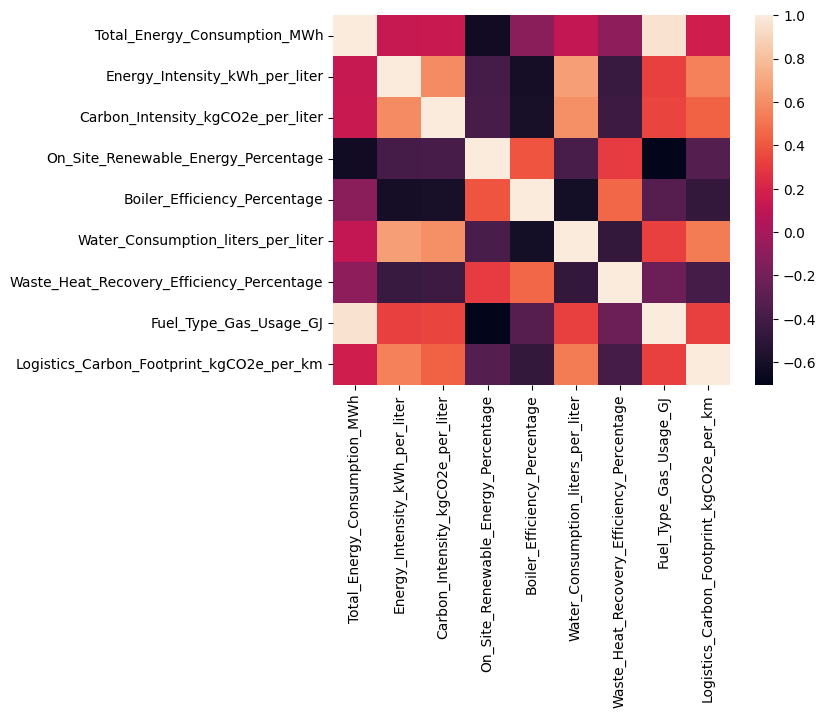

In [4]:
data_diageo_numeriical_mean = data_diageo_numeriical_df.mean()

data_diageo_numerical_std = data_diageo_numeriical_df.std()

print(data_diageo_numeriical_mean)
print(data_diageo_numerical_std)

data_diageo_numeriical_standardized_df = (data_diageo_numeriical_df - data_diageo_numeriical_mean) / (data_diageo_numerical_std)
data_diageo_numeriical_covariance = data_diageo_numeriical_standardized_df.cov()
print(data_diageo_numeriical_covariance)
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data_diageo_numeriical_covariance)
plt.show()

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(data_diageo_numeriical_covariance)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print(eigenvectors)
print(eigenvalues)

[[-0.23313737  0.61475903  0.0147124  -0.06221538 -0.10022403  0.00177229
   0.30911672  0.04752773 -0.67510819]
 [-0.37251983 -0.21918545 -0.20777652 -0.03031883  0.17702038 -0.51723038
   0.03992797  0.68373186 -0.03390314]
 [-0.35491288 -0.19105836 -0.15872083  0.44812487 -0.71852982  0.23733986
  -0.16582477  0.08937699 -0.0585144 ]
 [ 0.33650989 -0.33844529 -0.05121899 -0.14497963 -0.30266785  0.06276988
   0.79712891  0.13250785  0.00725897]
 [ 0.36131269  0.21571757  0.09300048 -0.27803059 -0.56325024 -0.58403806
  -0.27470853  0.0047708   0.05594769]
 [-0.37107608 -0.23970566 -0.1340885   0.04925603  0.01287963 -0.48769034
   0.21617733 -0.7050189  -0.05143748]
 [ 0.29410634  0.19293204 -0.92511819  0.09394422  0.07345724  0.01306721
  -0.04770322 -0.06081262  0.00830811]
 [-0.32701417  0.50791251 -0.01781369 -0.01145185 -0.09796883  0.01126476
   0.30053288  0.0312907   0.73048904]
 [-0.32556529 -0.15423944 -0.21449236 -0.82746069 -0.1353345   0.30489236
  -0.15857881 -0.05434

In [6]:
explained_var = np.cumsum(eigenvalues)/np.sum(eigenvalues)
explained_var

array([0.4860101 , 0.69585055, 0.76618607, 0.83247228, 0.87759318,
       0.92103304, 0.96117083, 0.99836367, 1.        ])

In [7]:
n_components = np.argmax(explained_var >= 0.95) +1
n_components

np.int64(7)

In [8]:
pca = PCA(n_components=n_components)
pca.fit(data_diageo_numeriical_standardized_df)
x_pca = pca.transform(data_diageo_numeriical_standardized_df)

df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

print(df_pca1)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7
0     3.905552  1.428293 -1.307381  0.613021  1.631997 -0.477656 -0.525156
1     4.791466  0.907899 -0.054808 -0.114816  1.204673 -0.054578  0.123954
2     4.870163  1.017047 -0.084203  1.013998  0.511127  0.960803  0.258929
3     4.079798  1.364484  0.514350 -1.216864  1.229993  1.263075  0.268881
4     4.462014  1.254724  0.608969  0.746857  1.124960  0.656924  0.089585
...        ...       ...       ...       ...       ...       ...       ...
1093  1.172457 -1.522885 -0.649716 -0.434921 -0.095176  0.112845 -0.587644
1094  1.053036 -1.352447 -0.036626  0.335726  0.942714  0.272811 -0.860145
1095  0.354643 -0.954260  0.882766 -0.191659  0.748389  0.463637 -0.600367
1096  0.840854 -1.282808 -0.853095  0.263893 -0.515281 -1.124445 -0.170991
1097  1.058108 -1.076559 -0.407606  0.386012 -0.410833 -0.207258 -0.856727

[1098 rows x 7 columns]


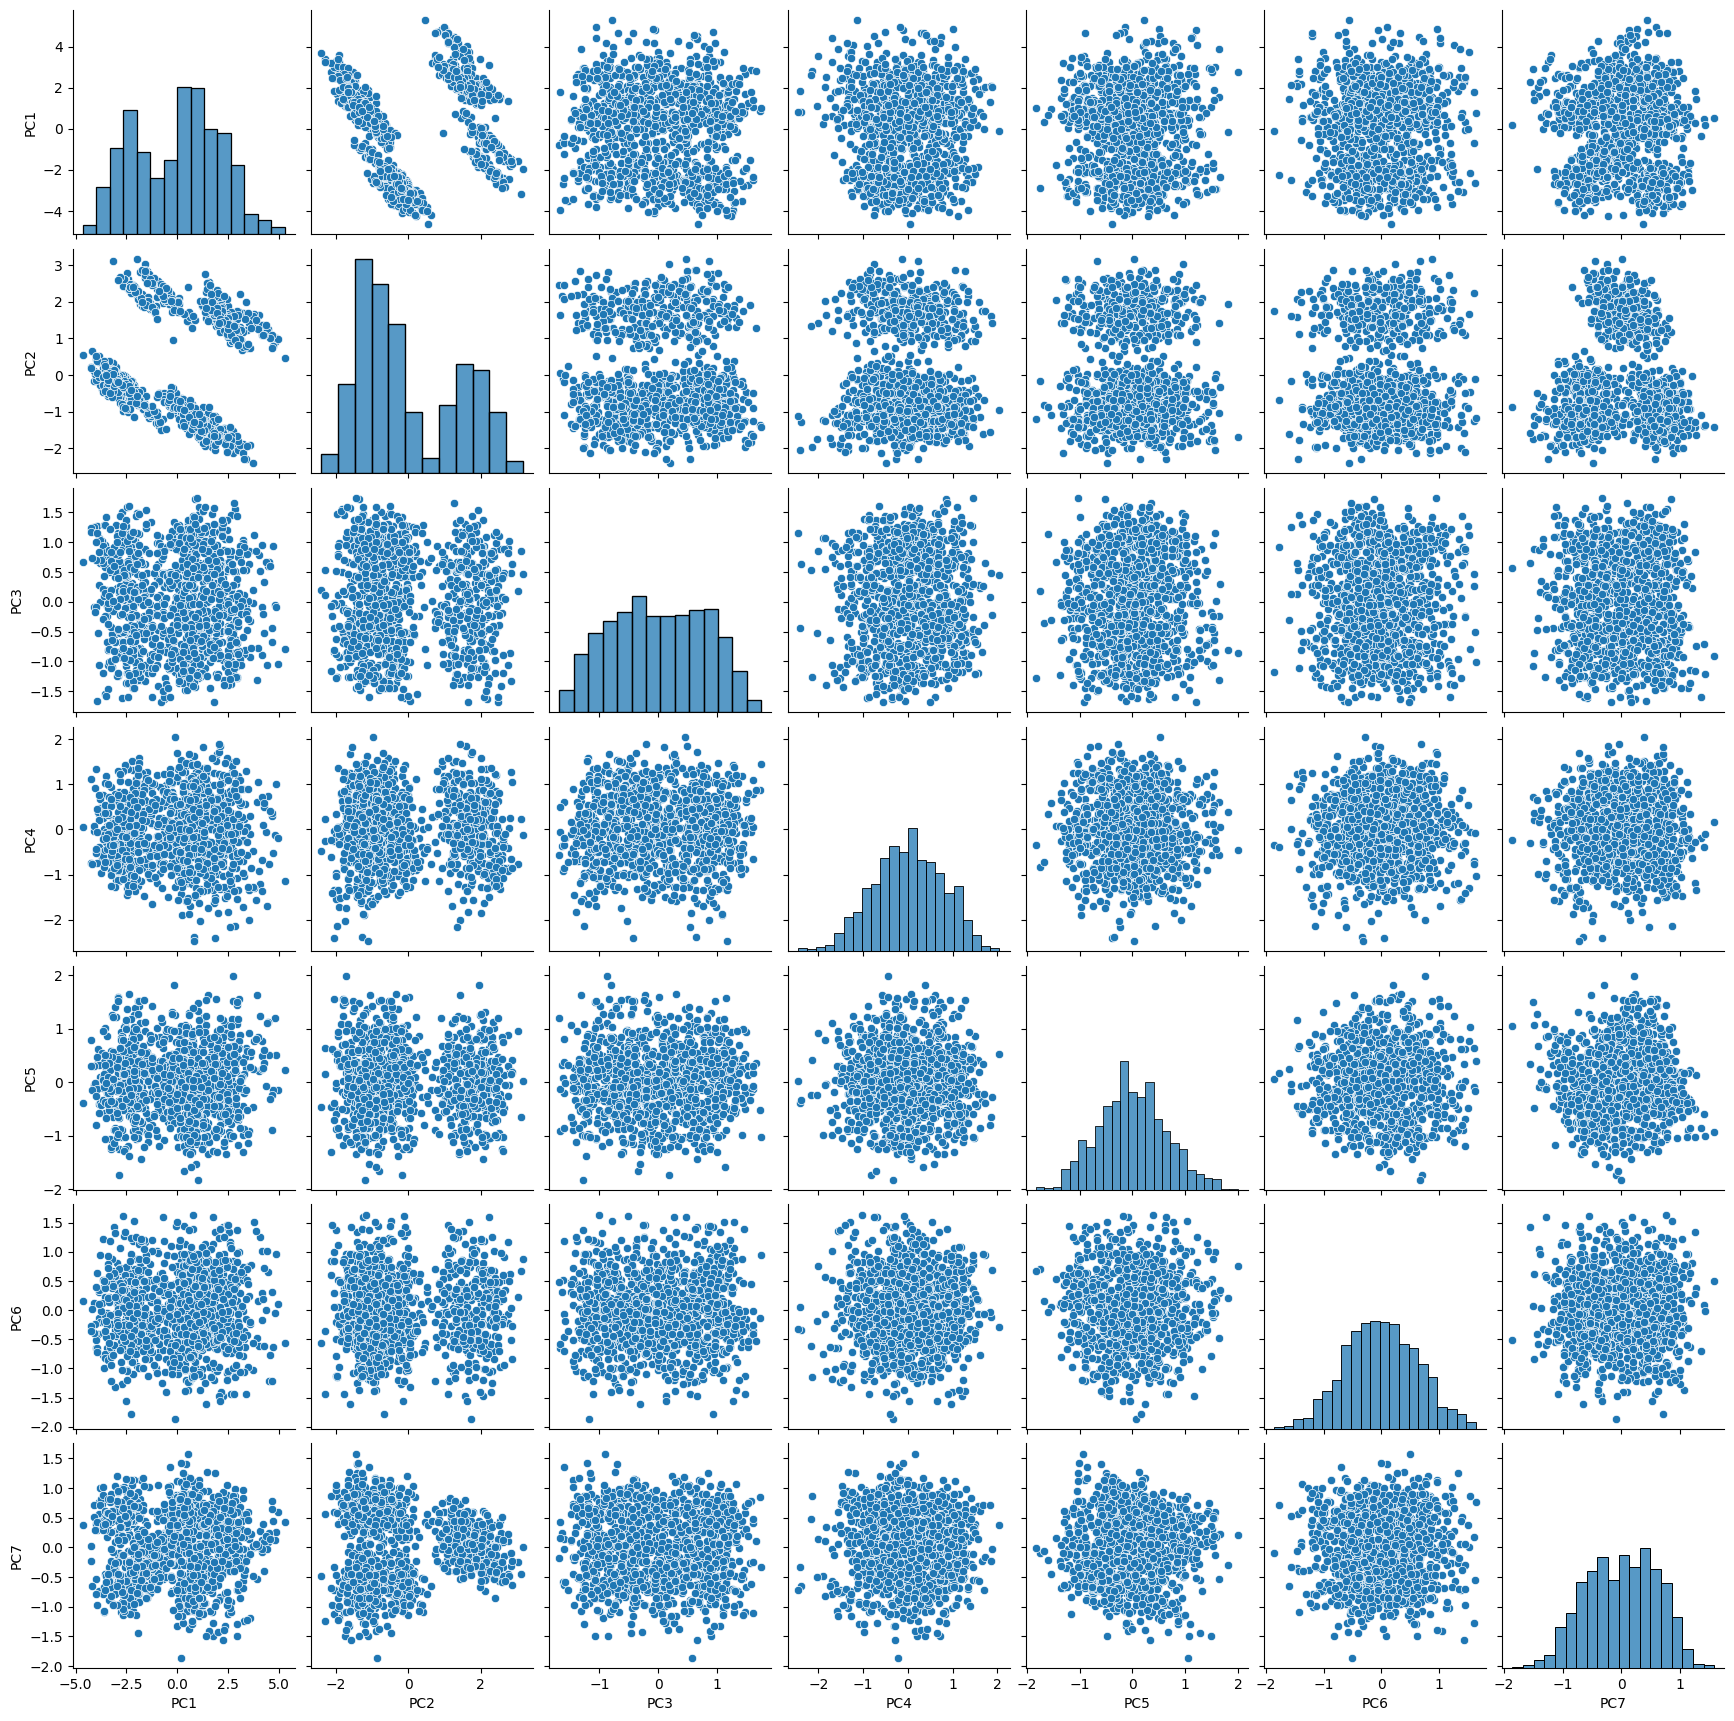

In [9]:
pca_df = pd.DataFrame(x_pca[:, :7], columns=[f'PC{i+1}' for i in range(7)])


# Pairplot (scatter plots for all components)
sns.pairplot(pca_df)
plt.show()

In [13]:
y_1 = data_diageo_df['Scope_1_Emissions_tonnes_CO2e']
y_2 = data_diageo_df['Scope_2_Emissions_tonnes_CO2e']
X_train, X_test, y_train, y_test = train_test_split(x_pca, y_1, test_size=0.3, random_state=42)
model_PCA_y_1 = LinearRegression()
model_PCA_y_1.fit(X_train, y_train)

r2_score = model_PCA_y_1.score(X_test, y_test)
print(f'R² Score: {r2_score:.4f}')

R² Score: 0.9934


In [14]:
model_PCA_Y_2 = LinearRegression()
model_PCA_Y_2.fit(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y_2, test_size=0.3, random_state=42)

r2_score = model_PCA_Y_2.score(X_test, y_test)
print(f'R² Score: {r2_score:.4f}')

R² Score: 0.7906


In [31]:
#Multiple linear regression

X = data_diageo_df.drop(["Scope_1_Emissions_tonnes_CO2e", 'Scope_2_Emissions_tonnes_CO2e', "Timestamp", "Site"], axis=1)
Y_1 = data_diageo_df['Scope_1_Emissions_tonnes_CO2e']
Y_2 = data_diageo_df['Scope_2_Emissions_tonnes_CO2e']
print(X.head(1))
print(Y_1.head())
print(Y_2.head())

   Total_Energy_Consumption_MWh  Energy_Intensity_kWh_per_liter  \
0                        1200.0                       50.551548   

   Carbon_Intensity_kgCO2e_per_liter  On_Site_Renewable_Energy_Percentage  \
0                          24.135068                            25.346819   

   Boiler_Efficiency_Percentage  Water_Consumption_liters_per_liter  \
0                     84.366987                             3.02381   

   Waste_Heat_Recovery_Efficiency_Percentage  Fuel_Type_Gas_Usage_GJ  \
0                                  50.244845             4743.014851   

   Logistics_Carbon_Footprint_kgCO2e_per_km  
0                                 98.757801  
0    620.000000
1    630.168416
2    638.578621
3    643.776413
4    644.863047
Name: Scope_1_Emissions_tonnes_CO2e, dtype: float64
0    744.000000
1    754.168416
2    762.578621
3    767.776413
4    768.863047
Name: Scope_2_Emissions_tonnes_CO2e, dtype: float64


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_1, test_size=0.3, random_state=42)
model_multi_y1 = LinearRegression()
model_multi_y1.fit(X_train, y_train)

r2 = model_multi_y1.score(X_test, y_test)
print(r2)

0.9959645815915672


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_2, test_size=0.3, random_state=42)
model_multi_y2 = LinearRegression()
model_multi_y2.fit(X_train, y_train)

r2 = model_multi_y2.score(X_test, y_test)
print(r2)

0.9927636817876407


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_1, test_size=0.3, random_state=42)
model_MLP_y1 = MLPRegressor(max_iter=500)
model_MLP_y1.fit(X_train, y_train)

mlp_score_y1 = model_MLP_y1.score(X_test, y_test)
mlp_score_y1

0.994645734840829

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_2, test_size=0.3, random_state=42)
model_MLP_y2 = MLPRegressor(max_iter=500)
model_MLP_y2.fit(X_train, y_train)

mlp_score_y2 = model_MLP_y2.score(X_test, y_test)
mlp_score_y2

0.991437105544749